* TP: Support Vector Machine
* Cours: Machine learning avancé 2022-2023
* Enseignante: Dr Lynda Ayachi


### **L'objectif de ce TP :**  Manipuler SVM

# Importation des bibliothèques


In [1]:
import pandas as pd
imimport numpy as np
import scipy as spport sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
sns.set(style="ticks")
%matplotlib inline

%matplotlib inline

Cette fonction trace la frontière de décision d'un modèle de classification pour un jeu de données 2D. Elle prend en entrée les données x et y, le modèle entraîné, un titre pour le graphique, l'axe des plots, les bornes des valeurs des axes (par défaut entre 0 et 1) et un booléen poly_flag qui indique si on doit utiliser une transformation polynomiale des features pour une frontière de décision non-linéaire.

In [2]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='gray', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
    return ax

Exemples :

* linéairement séparable et non séparable
* explorer le rôle des vecteurs de support
* explorer le compromis entre la marge et le taux de mauvaise classification
* comparer avec d'autres modèles





# 1. Linéairement séparable et non séparable

In [3]:
#### Load dataset_1

data1_train = pd.read_csv('data TP3\TP3_data1_train.csv')
data1_test = pd.read_csv('data TP3\TP3_data1_test.csv')


#### Load dataset_2

data2_train = pd.read_csv('data TP3\TP3_data2_train.csv')
data2_test = pd.read_csv('data TP3\TP3_data1_test.csv')



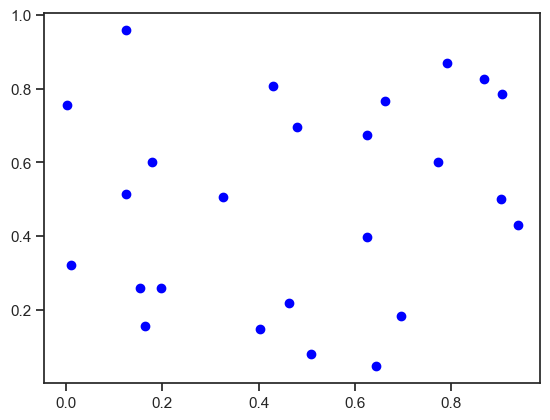

In [4]:

# Plot data avec scatter plot
plt.scatter(data1_train.x1,data1_train.x2, color='blue', label='Dataset 1')

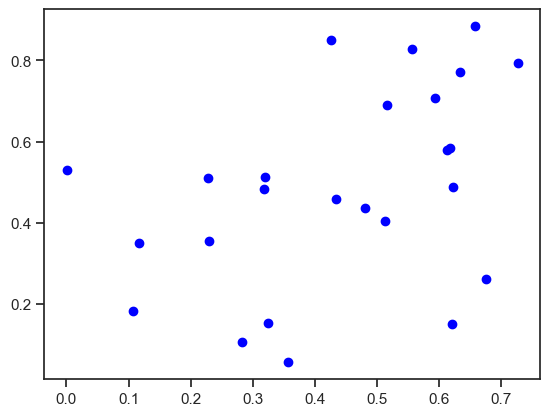

In [5]:
plt.scatter(data2_train.x1,data2_train.x2, color='blue', label='Dataset 2')

# 2. Explorer le rôle des vecteurs de support

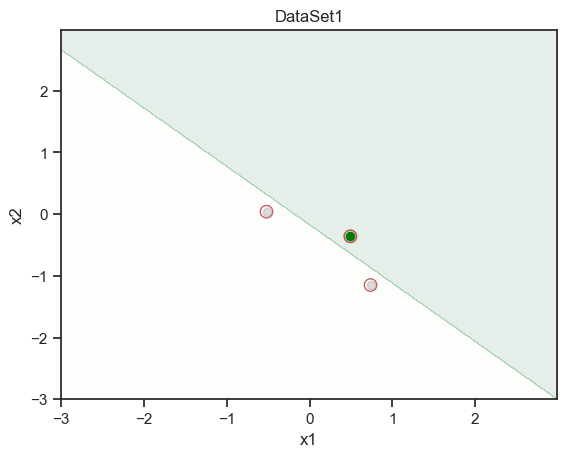

In [6]:
from sklearn.preprocessing import StandardScaler

#### Load dataset_1
x = data1_train[['x1', 'x2']].values
y = data1_train['y'].values


#### Fit SVM model with C = 1000, linear kernel using svm.SVC function
scaler = StandardScaler()
x = scaler.fit_transform(x)

clf1 = svm.SVC(kernel='linear', C=1000, random_state=42)
clf1.fit(x, y)


#### Plot decision boundary using the previously declared function
fig, ax = plt.subplots()

#plot_decision_boundary(x, y, clf1, 'Decision Boundary', ax, bounds=(-3, 3))


#### Highlight the support vectors using "model.support" function which retrieve the support vector indices
support_indices = clf1.support_
ax.scatter(x[support_indices, 0], x[support_indices, 1], facecolors='none', edgecolors='r', s=80)



#### Isolate only support vectors and their labels


#### Plot decision boundary with only support vectors

plot_decision_boundary(x[support_indices], y[support_indices], clf1, 'DataSet1', ax, bounds=(-3, 3))

#### Highlight the support vectors

plt.show()

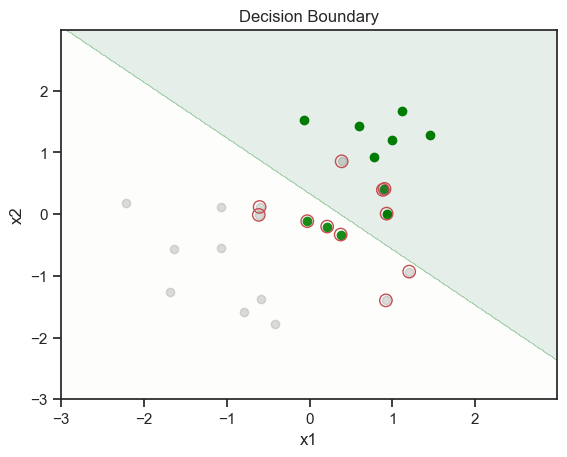

In [7]:
#### Same for dataset_2

#### Load dataset_2
x2 = data2_train[['x1', 'x2']].values
y2 = data2_train['y'].values


#### Fit SVM model with C = 1000, linear kernel using svm.SVC function
scaler = StandardScaler()
x2 = scaler.fit_transform(x2)

clf2 = svm.SVC(kernel='linear', C=1000, random_state=42)
clf2.fit(x2, y2)


#### Plot decision boundary using the previously declared function
fig2, ax2 = plt.subplots()

plot_decision_boundary(x2, y2, clf2, 'Decision Boundary', ax2, bounds=(-3, 3))


#### Highlight the support vectors using "model.support" function which retrieve the support vector indices
support_indices2 = clf2.support_
ax2.scatter(x2[support_indices2, 0], x2[support_indices2, 1], facecolors='none', edgecolors='r', s=80)



#### Isolate only support vectors and their labels


#### Plot decision boundary with only support vectors

#plot_decision_boundary(x2[support_indices], y2[support_indices], clf2, 'DataSet2', ax2, bounds=(-3, 3))

#### Highlight the support vectors

plt.show()













# 3. Explorer le compromis entre la marge et le taux de mauvaise classification

In [8]:
#--------  fit_and_plot_svm_for_c
# Cfloat, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set) 
#
# Input: 
#      x_train (array of train predictors)
#      y_train (array of train responses)#      
#      x_test (array of test predictors)
#      y_test (array of test responses)
#      bounds (tuple of bounds for plotting)
#      C  (value for parameter C)
#      ax (axes to plot on)

def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

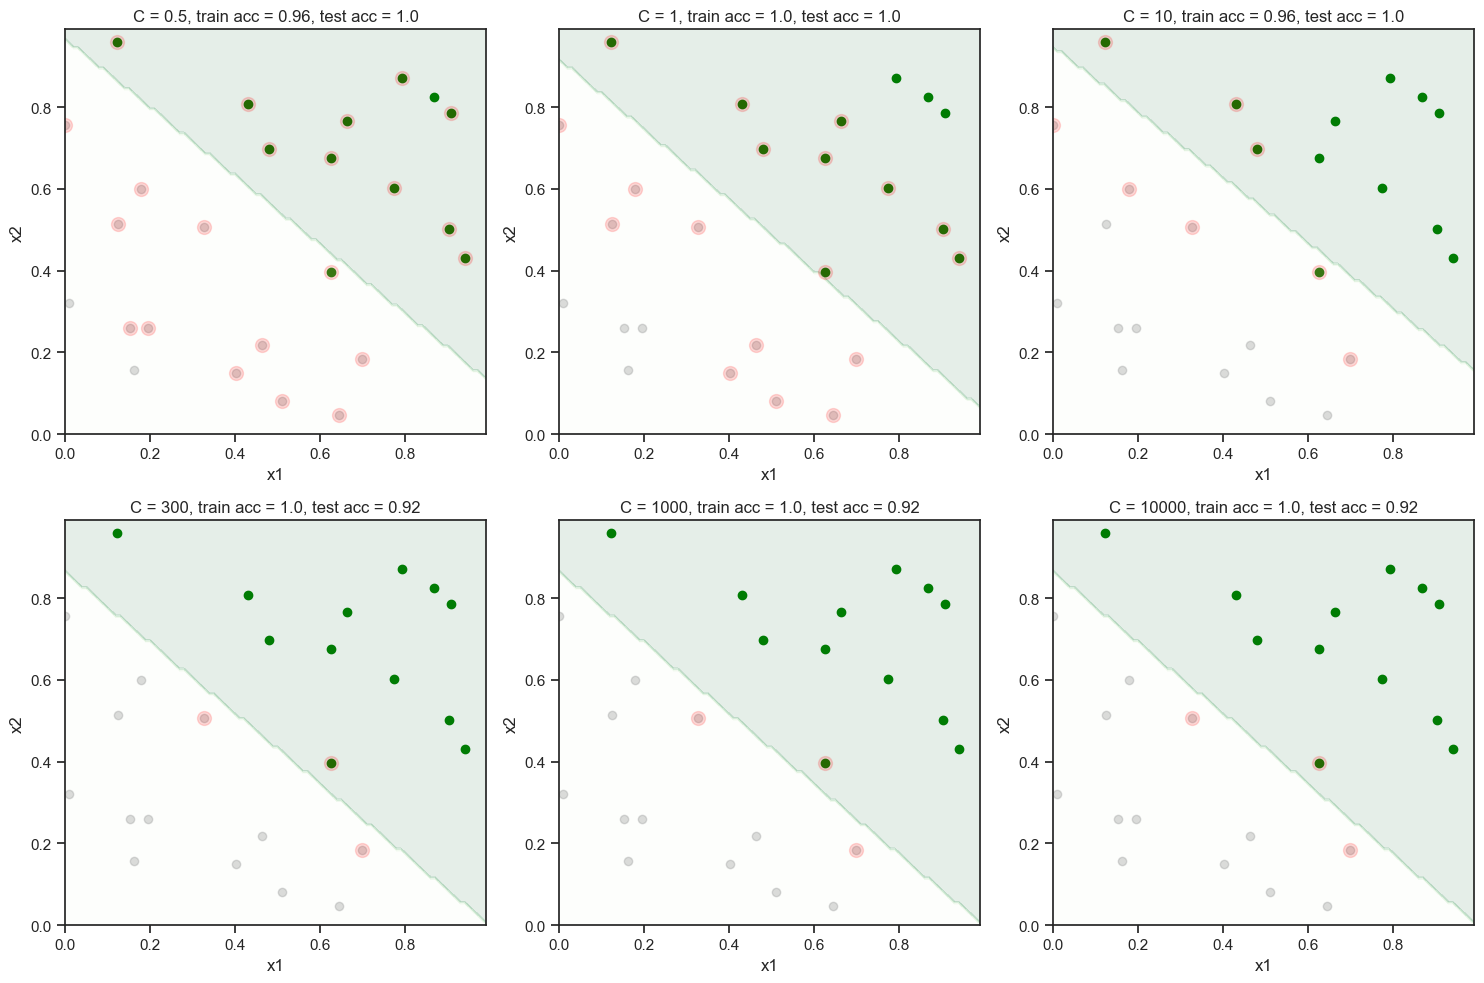

In [11]:
#### Load train data
data1_train = pd.read_csv('data TP3\TP3_data1_train.csv')
x_train = data1_train[['x1', 'x2']].values
y_train = data1_train['y'].values 

#### Load test data
data1_test = pd.read_csv('data TP3\TP3_data1_test.csv')
x_test = data1_test[['x1', 'x2']].values
y_test = data1_test['y'].values 

#### Fit and plot for different 'C' values
fig, ax3 = plt.subplots(2, 3, figsize = (15, 10))

C_values = [0.5, 1, 10, 300, 1000, 10000]

# Iterate over each axes object in the array and call the function with a single axes object each time
for i, ax3 in enumerate(ax3.flatten()):
    
    # Get current value of C
    C = C_values[i]
    
    # Call fit_and_plot_svm_for_c function to plot decision boundary for current value of C
    fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, ax3, bounds=(0, 1))

plt.tight_layout()
plt.show()

# 4. Comparaison avec les autres modèles

In [13]:
def fit_logistic_plot(x_train, x_test, y_train, y_test, C, ax):
    logreg = LogisticRegression(C=C)
    logreg.fit(x_train, y_train)
    test_score = logreg.score(x_test, y_test)
    train_score = logreg.score(x_train, y_train)
    ax = plot_decision_boundary(x_train, y_train, logreg, 'Logistic Regression, C = ' + str(C) + ', train acc = ' + str(train_score) + ', test acc = ' + str(test_score), ax, bounds=(0, 1), poly_flag=False)
    return ax

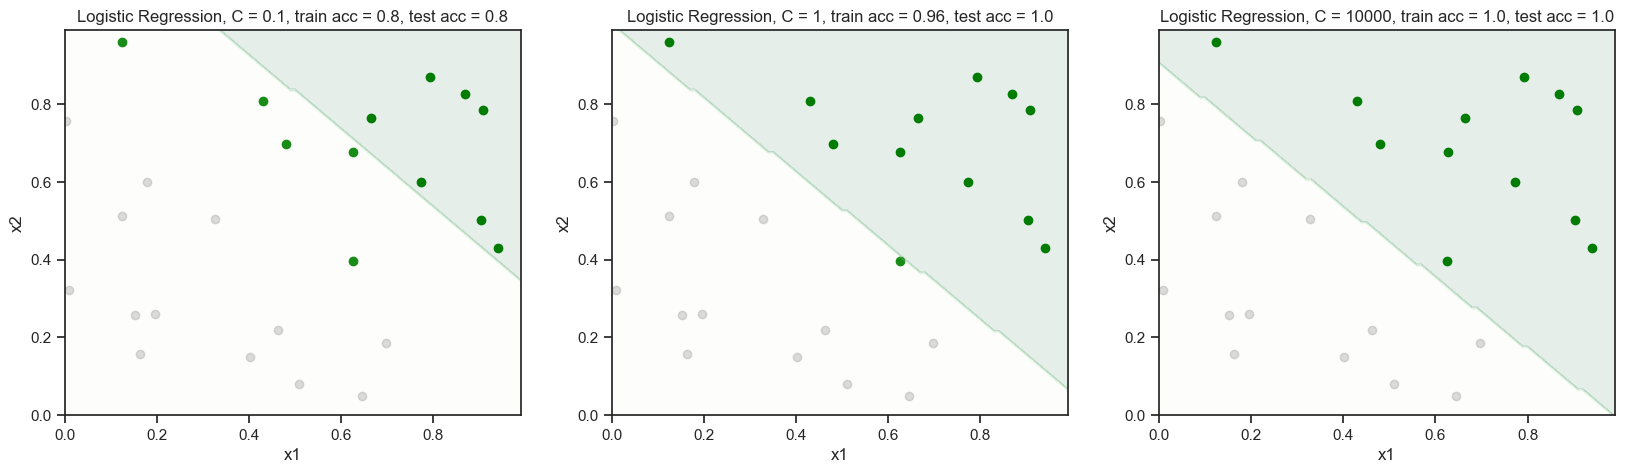

In [54]:
#### use fit_logistic_plot for C=0.01, C=1 , C=10000 )

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0] = fit_logistic_plot(x_train, x_test, y_train, y_test, 0.1, ax[0])
ax[1] = fit_logistic_plot(x_train, x_test, y_train, y_test, 1, ax[1])
ax[2] = fit_logistic_plot(x_train, x_test, y_train, y_test, 10000 , ax[2])
    
plt.show()

In [47]:
def fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, C, ax, degree, bounds=(0, 1)):
    # Fit SVM model
   
    model = svm.SVC(C=C, kernel='poly', degree=degree)
    model.fit(x_train, y_train)
    
    # Train and test error
    
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)
    
    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

InvalidIndexError: (19    False
18    False
12    False
10    False
27    False
3     False
7     False
21    False
2     False
13    False
26    False
0     False
23    False
20    False
11    False
5     False
29    False
25    False
28    False
24    False
16    False
8     False
22    False
15    False
Name: Salary, dtype: bool, 0)

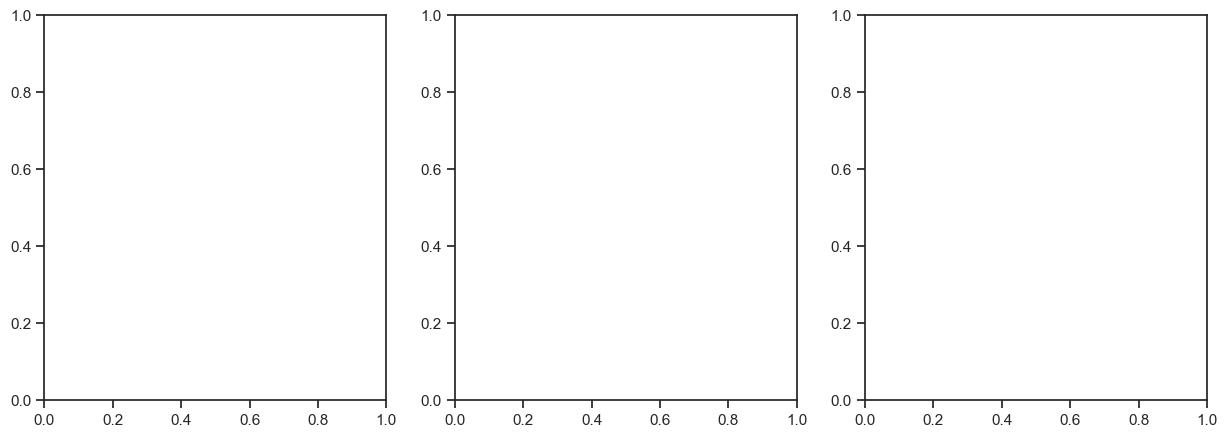

In [64]:
# Fit and plot for different 'C' values when polynomial degree is 4
fig, ax5 = plt.subplots(1, 3, figsize = (15, 5))


C_values = [1,300,2000]

# Iterate over each axes object in the array and call the function with a single axes object each time
for i, ax5 in enumerate(ax5.flatten()):
    
    # Get current value of C
    C = C_values[i]
    
    # Call fit_and_plot_svm_for_c function to plot decision boundary for current value of degree
    fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, C, ax5, degree=4, bounds=(0, 1))



plt.tight_layout()

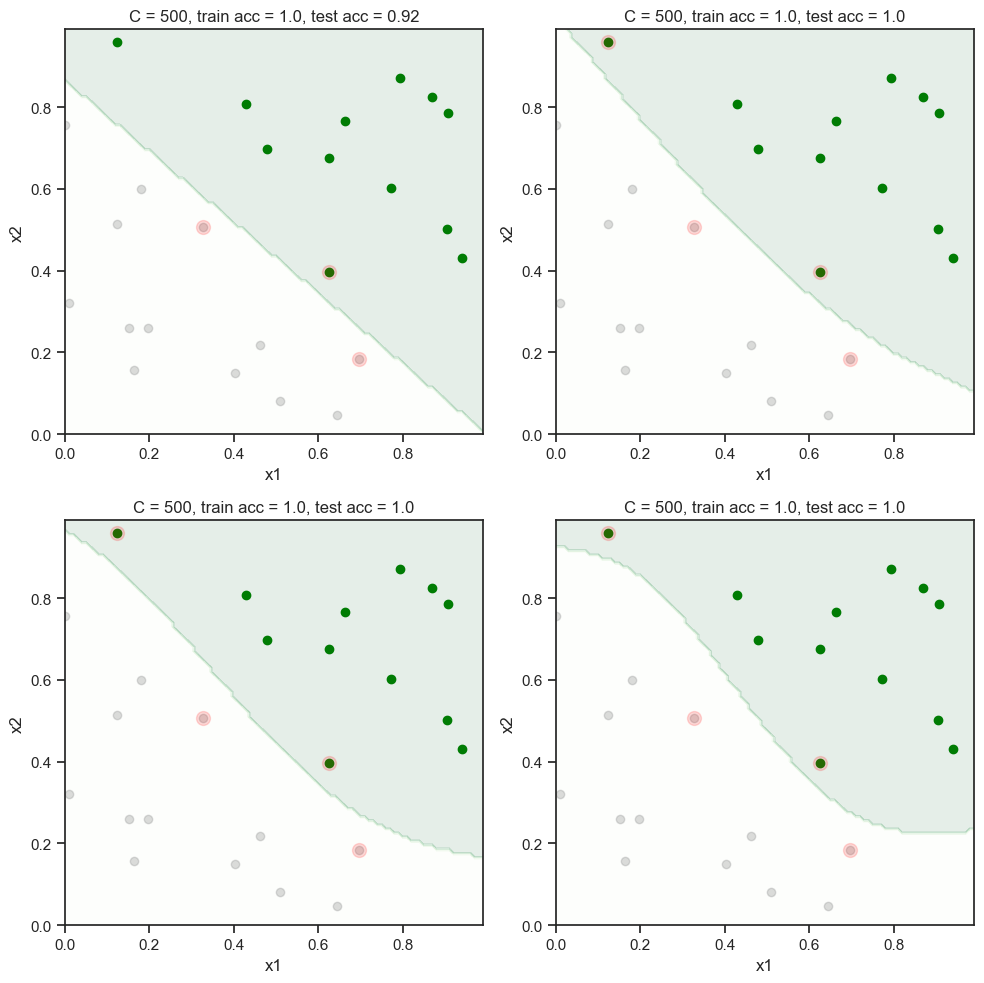

In [52]:
# Fit and plot for different degrees for polynomial boundary
fig, ax6 = plt.subplots(2, 2, figsize = (10, 10))


deg_values = [1,3,5,9]
C=500

# Iterate over each axes object in the array and call the function with a single axes object each time
for i, ax6 in enumerate(ax6.flatten()):
    
    # Get current value of C
    deg = deg_values[i]
    
    # Call fit_and_plot_svm_for_c function to plot decision boundary for current value of degree
    fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, C, ax6, degree=deg, bounds=(0, 1))



plt.tight_layout()





In [51]:
# What about other kernels?
def fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1), kernel = 'rbf'):
    # Fit SVM model
    model = svm.SVC(C=C, kernel=kernel)
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax



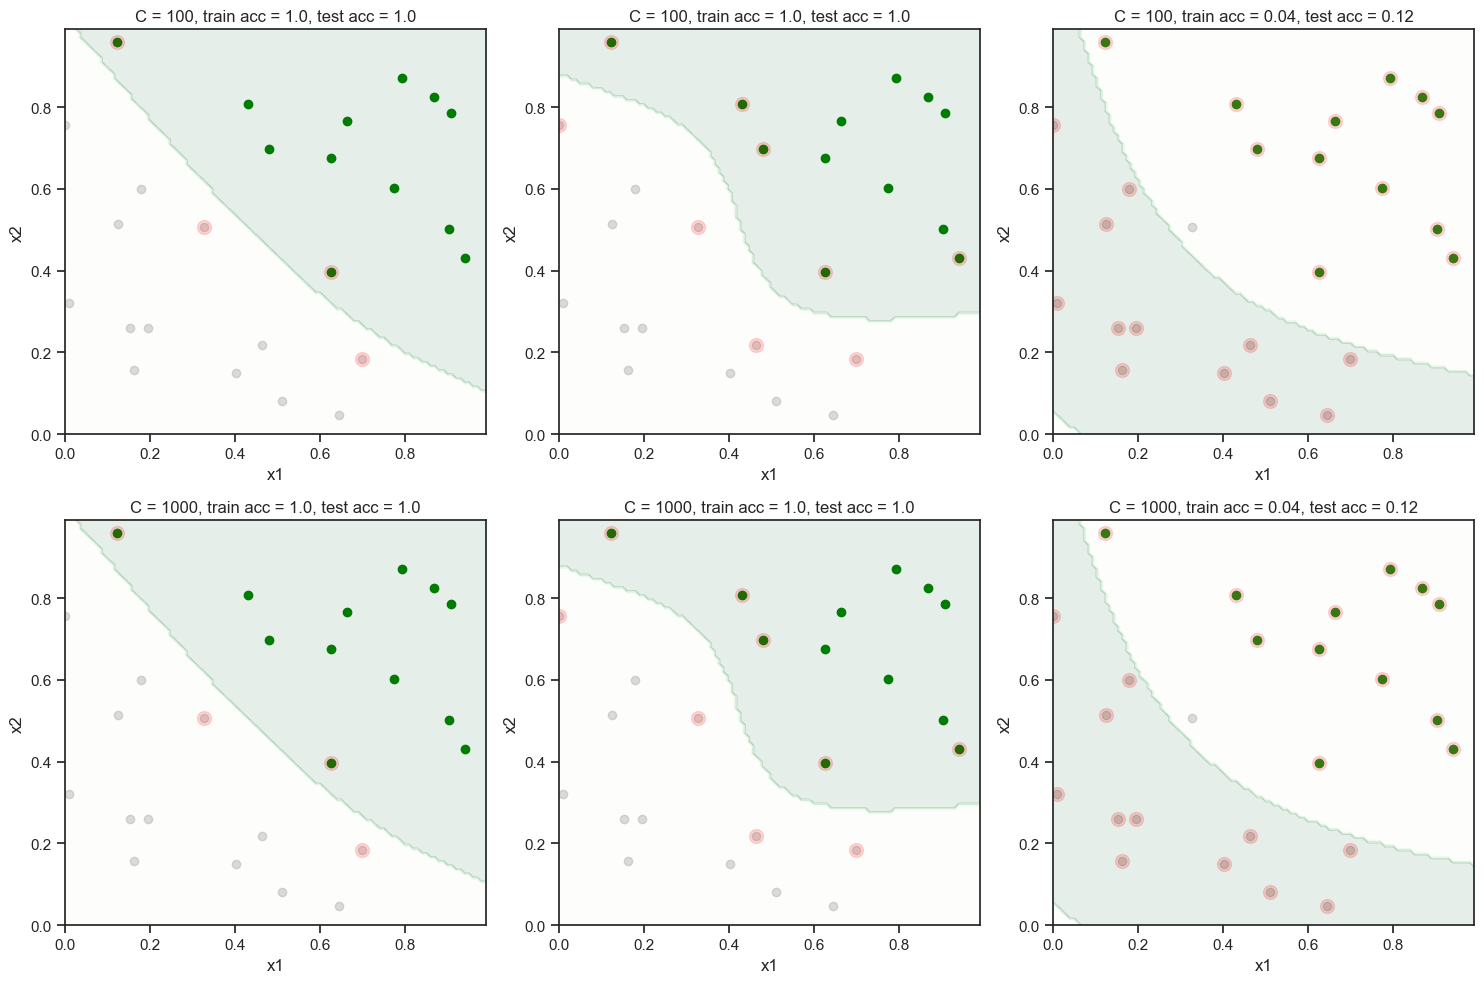

In [53]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0, 0] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 0], kernel = "poly")

ax[0, 1] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 1], kernel = "rbf")

ax[0, 2] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 2], kernel = "sigmoid")

ax[1, 0] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 0], kernel = "poly")

ax[1, 1] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 1], kernel = "rbf")

ax[1, 2] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 2], kernel = "sigmoid")


plt.tight_layout()

# Cross Validation ? 

In [69]:

def fit_svm(x_train, y_train, x_test, y_test, C, kernel = 'rbf'):
    # Fit SVM model
    model = svm.SVC(C=C, kernel=kernel)
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)
    
    return(model)

In [73]:
from sklearn.model_selection import cross_val_score

SVM_Model= fit_svm(x_train, y_train, x_test, y_test, C, kernel = 'rbf')

scores = cross_val_score(SVM_Model, x, y, cv=3)

# Print the cross-validation scores and their mean
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1. 1. 1.]
Average cross-validation score: 1.00
